In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [4]:
os.getcwd()
signal_df=pd.read_csv('Signal.csv')
signal_df

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


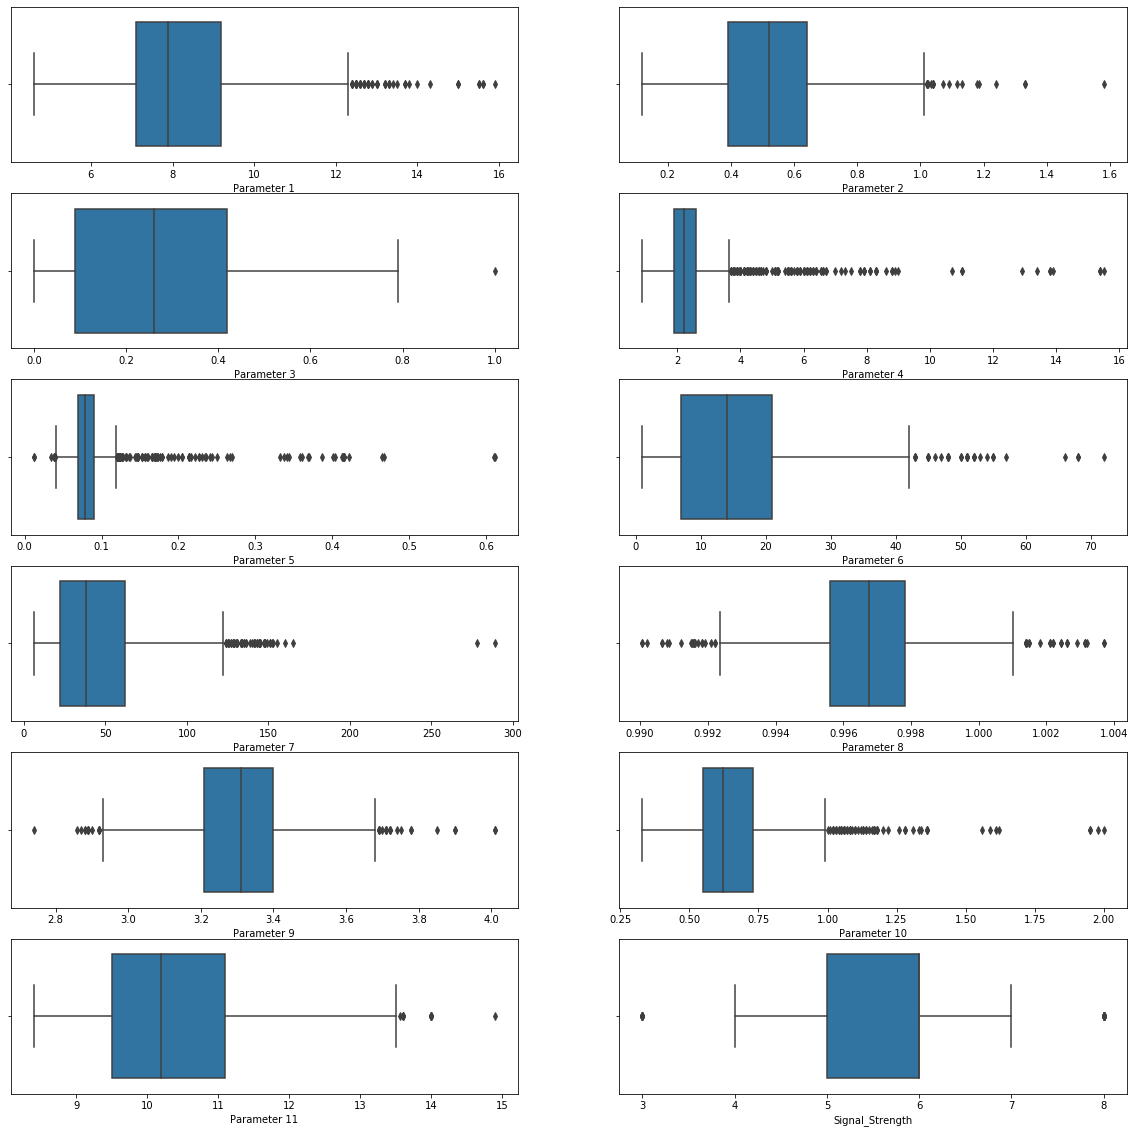

In [5]:
df_columns=signal_df.columns
plt.figure(figsize=(20,20))
for i,val in enumerate(df_columns):
    plt.subplot(6,2,i+1)
    ax = sns.boxplot(signal_df[val])

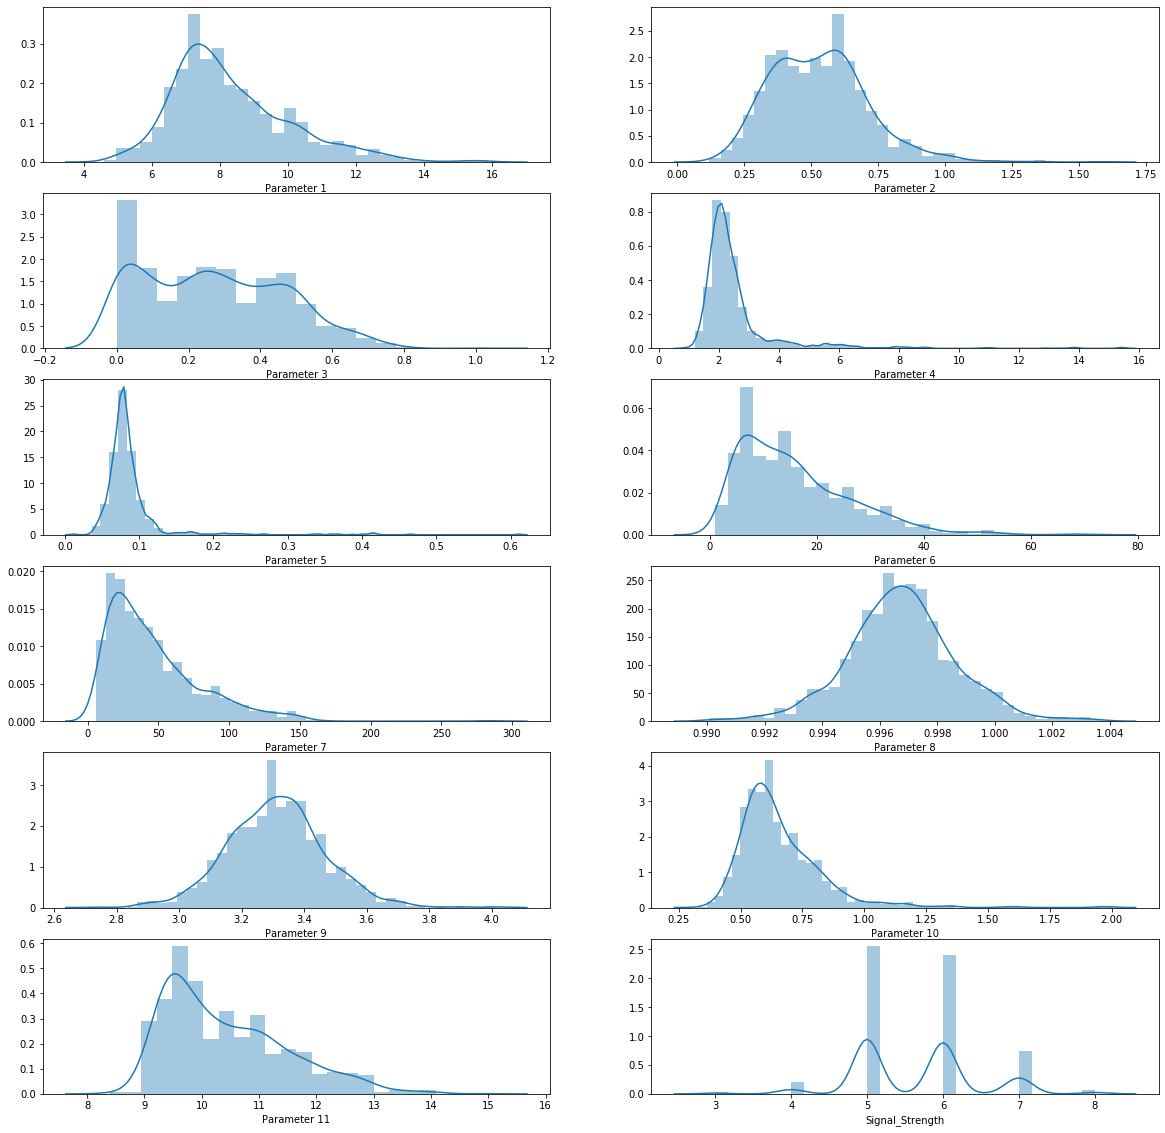

In [6]:
df_columns=signal_df.columns
plt.figure(figsize=(20,20))
for i,val in enumerate(df_columns):
    plt.subplot(6,2,i+1)
    ax = sns.distplot(signal_df[val])

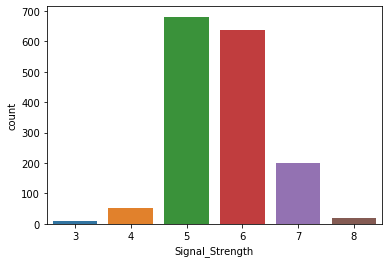

In [7]:
ax = sns.countplot(signal_df['Signal_Strength'])

# Nueral Network Regressor

In [8]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

In [9]:

#Changing pandas dataframe to numpy array
X = signal_df.iloc[:,0:11].values
y = signal_df.iloc[:,11:12].values

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 1)


In [11]:
model = Sequential()
model.add(Dense(200, input_dim=11, activation='relu'))
model.add(Dense(200, input_dim=200, activation='relu'))
model.add(Dense(200, input_dim=200, activation='relu'))
model.add(Dense(1, activation='linear'))

In [12]:
keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mean_absolute_percentage_error'])

In [13]:
#To visualize neural network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2400      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 83,001
Trainable params: 83,001
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32,validation_split=0.15,validation_data=None,verbose=1)

Epoch 1/100
37/37 [==============================] - 0s 9ms/step - loss: 7.4475 - mean_absolute_percentage_error: 31.8265 - val_loss: 1.4862 - val_mean_absolute_percentage_error: 18.7905
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3855 - mean_absolute_percentage_error: 21.0181 - val_loss: 3.4982 - val_mean_absolute_percentage_error: 27.4567
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 1.5794 - mean_absolute_percentage_error: 17.1916 - val_loss: 0.5552 - val_mean_absolute_percentage_error: 10.8362
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 1.3362 - mean_absolute_percentage_error: 15.8766 - val_loss: 1.9773 - val_mean_absolute_percentage_error: 21.0795
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 1.1210 - mean_absolute_percentage_error: 14.9264 - val_loss: 1.1413 - val_mean_absolute_percentage_error: 14.9162
Epoch 6/100
37/37 [==============================] - 0s 3ms/step 

Epoch 45/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4987 - mean_absolute_percentage_error: 10.0829 - val_loss: 0.5242 - val_mean_absolute_percentage_error: 9.3904
Epoch 46/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5177 - mean_absolute_percentage_error: 10.2938 - val_loss: 0.4809 - val_mean_absolute_percentage_error: 8.9243
Epoch 47/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5347 - mean_absolute_percentage_error: 10.4444 - val_loss: 0.5752 - val_mean_absolute_percentage_error: 10.0095
Epoch 48/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5219 - mean_absolute_percentage_error: 10.3268 - val_loss: 0.4635 - val_mean_absolute_percentage_error: 9.8106
Epoch 49/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5015 - mean_absolute_percentage_error: 10.1320 - val_loss: 0.7761 - val_mean_absolute_percentage_error: 11.8405
Epoch 50/100
37/37 [==============================] - 0s 3ms/st

Epoch 89/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4463 - mean_absolute_percentage_error: 9.5035 - val_loss: 0.5133 - val_mean_absolute_percentage_error: 10.6199
Epoch 90/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4447 - mean_absolute_percentage_error: 9.6030 - val_loss: 0.9598 - val_mean_absolute_percentage_error: 15.8954
Epoch 91/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4593 - mean_absolute_percentage_error: 9.7212 - val_loss: 0.4613 - val_mean_absolute_percentage_error: 9.3457
Epoch 92/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4413 - mean_absolute_percentage_error: 9.3674 - val_loss: 0.8582 - val_mean_absolute_percentage_error: 11.9327
Epoch 93/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4531 - mean_absolute_percentage_error: 9.6292 - val_loss: 0.8552 - val_mean_absolute_percentage_error: 14.8297
Epoch 94/100
37/37 [==============================] - 0s 2ms/step 

In [15]:
model.save('neural_regression.h5')

In [16]:
from tensorflow.keras.models import load_model
regressor = load_model('neural_regression.h5')
y_pred=regressor.predict(X_test)

In [17]:
print('X_test',X_test[0],'\n','y_test',y_test[0],'y_pred',y_pred[0])

X_test [ 8.8     0.41    0.64    2.2     0.093   9.     42.      0.9986  3.54
  0.66   10.5   ] 
 y_test [5] y_pred [6.2067733]


# Nueral Network Classifier

In [18]:
X = signal_df.iloc[:,0:11].values
y = signal_df.iloc[:,11:12]
y=pd.get_dummies(y['Signal_Strength'])
y_val=y.values

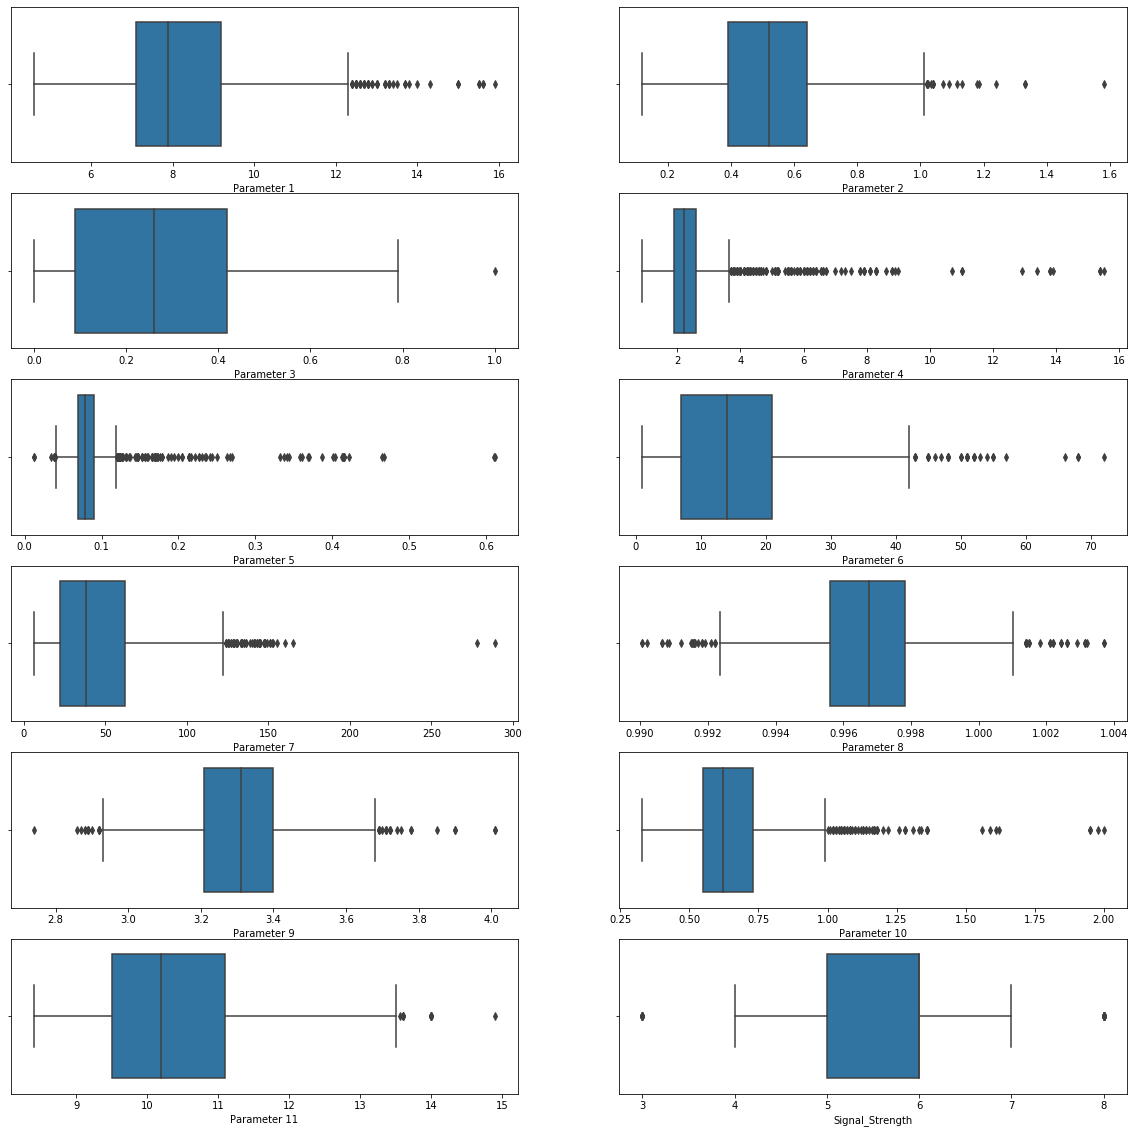

In [19]:
df_columns=signal_df.columns
plt.figure(figsize=(20,20))
for i,val in enumerate(df_columns):
    plt.subplot(6,2,i+1)
    ax = sns.boxplot(signal_df[val])

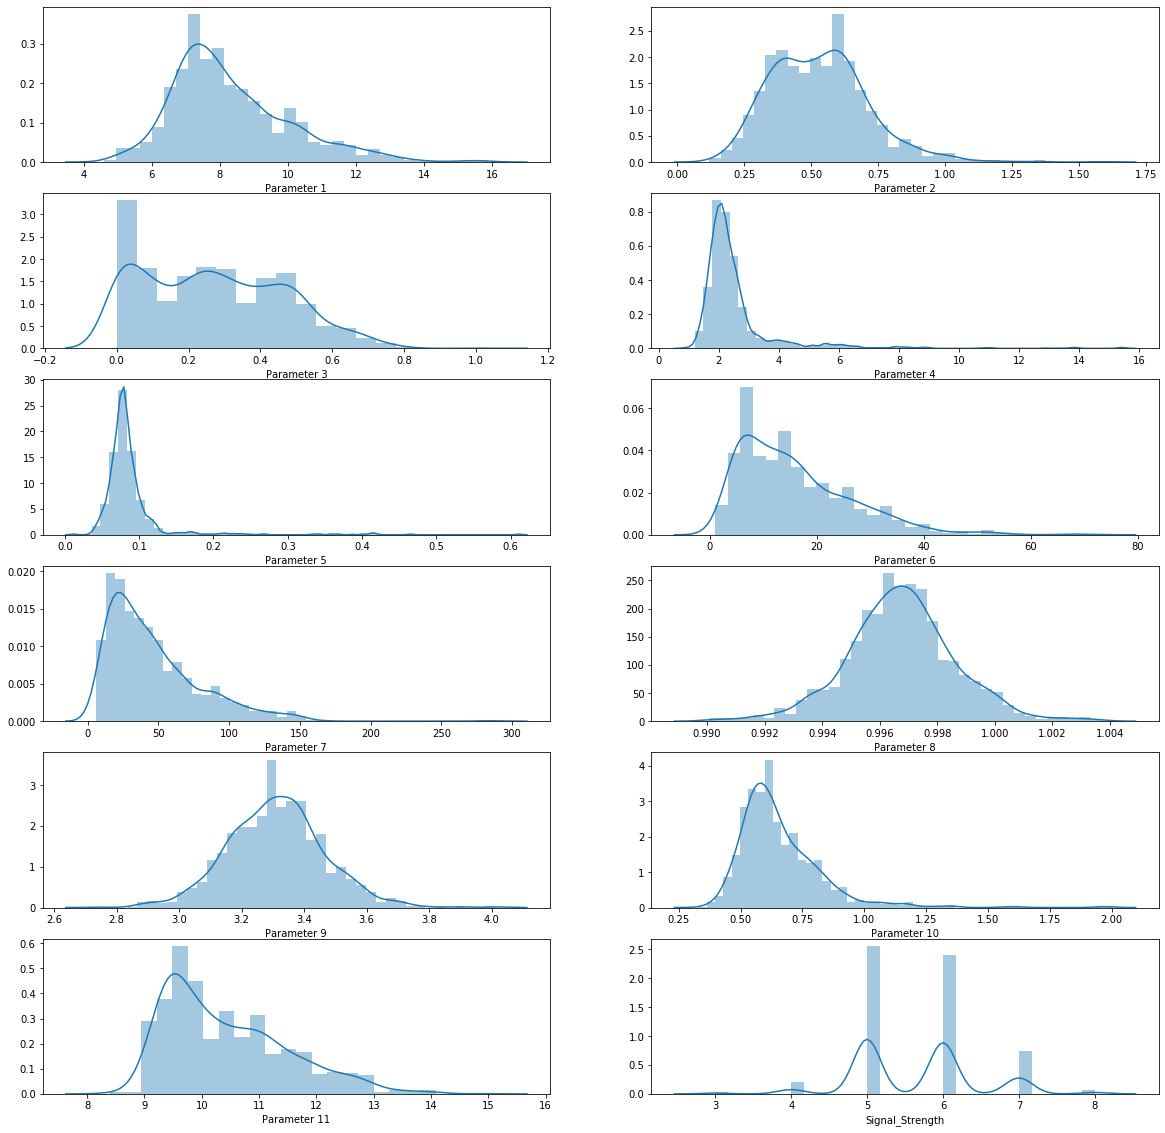

In [20]:
df_columns=signal_df.columns
plt.figure(figsize=(20,20))
for i,val in enumerate(df_columns):
    plt.subplot(6,2,i+1)
    ax = sns.distplot(signal_df[val])

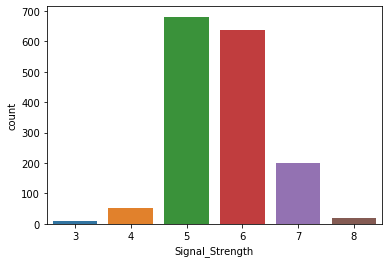

In [21]:
ax = sns.countplot(signal_df['Signal_Strength'])

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y_val,test_size = 0.15,random_state = 1)

In [23]:
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))


In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32,validation_split=0.15,validation_data=None,verbose=1)


Epoch 1/500
37/37 [==============================] - 0s 7ms/step - loss: 2.6320 - accuracy: 0.3931 - val_loss: 1.2199 - val_accuracy: 0.4559
Epoch 2/500
37/37 [==============================] - 0s 2ms/step - loss: 1.2900 - accuracy: 0.4519 - val_loss: 1.1634 - val_accuracy: 0.4902
Epoch 3/500
37/37 [==============================] - 0s 2ms/step - loss: 1.2312 - accuracy: 0.4554 - val_loss: 1.1265 - val_accuracy: 0.4902
Epoch 4/500
37/37 [==============================] - 0s 2ms/step - loss: 1.2091 - accuracy: 0.4935 - val_loss: 1.1623 - val_accuracy: 0.4559
Epoch 5/500
37/37 [==============================] - 0s 2ms/step - loss: 1.1782 - accuracy: 0.4831 - val_loss: 1.1055 - val_accuracy: 0.5392
Epoch 6/500
37/37 [==============================] - 0s 2ms/step - loss: 1.1526 - accuracy: 0.5100 - val_loss: 1.1208 - val_accuracy: 0.5000
Epoch 7/500
37/37 [==============================] - 0s 2ms/step - loss: 1.1536 - accuracy: 0.4978 - val_loss: 1.1005 - val_accuracy: 0.5245
Epoch 8/500
3

Epoch 59/500
37/37 [==============================] - 0s 2ms/step - loss: 0.9487 - accuracy: 0.5870 - val_loss: 0.9718 - val_accuracy: 0.5784
Epoch 60/500
37/37 [==============================] - 0s 2ms/step - loss: 0.9526 - accuracy: 0.5827 - val_loss: 0.9854 - val_accuracy: 0.6078
Epoch 61/500
37/37 [==============================] - 0s 2ms/step - loss: 0.9423 - accuracy: 0.5931 - val_loss: 1.0276 - val_accuracy: 0.5098
Epoch 62/500
37/37 [==============================] - 0s 2ms/step - loss: 0.9464 - accuracy: 0.5879 - val_loss: 0.9723 - val_accuracy: 0.5588
Epoch 63/500
37/37 [==============================] - 0s 2ms/step - loss: 0.9653 - accuracy: 0.5645 - val_loss: 0.9746 - val_accuracy: 0.5588
Epoch 64/500
37/37 [==============================] - 0s 2ms/step - loss: 0.9532 - accuracy: 0.5810 - val_loss: 1.0280 - val_accuracy: 0.5147
Epoch 65/500
37/37 [==============================] - 0s 2ms/step - loss: 0.9657 - accuracy: 0.5905 - val_loss: 1.0772 - val_accuracy: 0.4853
Epoch 

37/37 [==============================] - 0s 2ms/step - loss: 0.9136 - accuracy: 0.6052 - val_loss: 0.9639 - val_accuracy: 0.5637
Epoch 117/500
37/37 [==============================] - 0s 2ms/step - loss: 0.9241 - accuracy: 0.6087 - val_loss: 0.9661 - val_accuracy: 0.5980
Epoch 118/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8992 - accuracy: 0.6017 - val_loss: 0.9814 - val_accuracy: 0.5294
Epoch 119/500
37/37 [==============================] - 0s 2ms/step - loss: 0.9101 - accuracy: 0.6035 - val_loss: 1.0219 - val_accuracy: 0.5098
Epoch 120/500
37/37 [==============================] - 0s 2ms/step - loss: 0.9036 - accuracy: 0.6173 - val_loss: 0.9617 - val_accuracy: 0.5686
Epoch 121/500
37/37 [==============================] - 0s 2ms/step - loss: 0.9060 - accuracy: 0.6147 - val_loss: 0.9599 - val_accuracy: 0.5931
Epoch 122/500
37/37 [==============================] - 0s 2ms/step - loss: 0.9246 - accuracy: 0.5922 - val_loss: 0.9632 - val_accuracy: 0.5882
Epoch 123/500

37/37 [==============================] - 0s 2ms/step - loss: 0.8532 - accuracy: 0.6390 - val_loss: 0.9950 - val_accuracy: 0.5882
Epoch 174/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8728 - accuracy: 0.6165 - val_loss: 0.9721 - val_accuracy: 0.5784
Epoch 175/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8653 - accuracy: 0.6190 - val_loss: 0.9976 - val_accuracy: 0.5833
Epoch 176/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8527 - accuracy: 0.6286 - val_loss: 0.9810 - val_accuracy: 0.5686
Epoch 177/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8548 - accuracy: 0.6381 - val_loss: 0.9709 - val_accuracy: 0.5833
Epoch 178/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8525 - accuracy: 0.6424 - val_loss: 0.9740 - val_accuracy: 0.5784
Epoch 179/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8673 - accuracy: 0.6234 - val_loss: 0.9790 - val_accuracy: 0.5686
Epoch 180/500

37/37 [==============================] - 0s 2ms/step - loss: 0.8268 - accuracy: 0.6346 - val_loss: 1.0044 - val_accuracy: 0.5686
Epoch 231/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8195 - accuracy: 0.6641 - val_loss: 1.0158 - val_accuracy: 0.5392
Epoch 232/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8326 - accuracy: 0.6450 - val_loss: 1.0375 - val_accuracy: 0.5539
Epoch 233/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8325 - accuracy: 0.6459 - val_loss: 1.0091 - val_accuracy: 0.5588
Epoch 234/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8173 - accuracy: 0.6545 - val_loss: 1.0172 - val_accuracy: 0.5784
Epoch 235/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8170 - accuracy: 0.6649 - val_loss: 1.0181 - val_accuracy: 0.5686
Epoch 236/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8187 - accuracy: 0.6623 - val_loss: 1.0112 - val_accuracy: 0.5784
Epoch 237/500

37/37 [==============================] - 0s 2ms/step - loss: 0.7829 - accuracy: 0.6805 - val_loss: 1.0445 - val_accuracy: 0.5686
Epoch 288/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7856 - accuracy: 0.6823 - val_loss: 1.0550 - val_accuracy: 0.5539
Epoch 289/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7923 - accuracy: 0.6632 - val_loss: 1.1169 - val_accuracy: 0.5588
Epoch 290/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8174 - accuracy: 0.6545 - val_loss: 1.0197 - val_accuracy: 0.5882
Epoch 291/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7891 - accuracy: 0.6693 - val_loss: 1.0589 - val_accuracy: 0.5931
Epoch 292/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7905 - accuracy: 0.6701 - val_loss: 1.0293 - val_accuracy: 0.5784
Epoch 293/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8192 - accuracy: 0.6571 - val_loss: 1.0426 - val_accuracy: 0.5980
Epoch 294/500

37/37 [==============================] - 0s 2ms/step - loss: 0.7580 - accuracy: 0.6753 - val_loss: 1.0798 - val_accuracy: 0.5735
Epoch 345/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7617 - accuracy: 0.6926 - val_loss: 1.0874 - val_accuracy: 0.5735
Epoch 346/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7585 - accuracy: 0.6848 - val_loss: 1.0961 - val_accuracy: 0.5735
Epoch 347/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7798 - accuracy: 0.6684 - val_loss: 1.0910 - val_accuracy: 0.5882
Epoch 348/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7902 - accuracy: 0.6571 - val_loss: 1.0780 - val_accuracy: 0.5735
Epoch 349/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7678 - accuracy: 0.6745 - val_loss: 1.1044 - val_accuracy: 0.5735
Epoch 350/500
37/37 [==============================] - 0s 2ms/step - loss: 0.8015 - accuracy: 0.6649 - val_loss: 1.1164 - val_accuracy: 0.5588
Epoch 351/500

37/37 [==============================] - 0s 2ms/step - loss: 0.7407 - accuracy: 0.6926 - val_loss: 1.1110 - val_accuracy: 0.6078
Epoch 402/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7462 - accuracy: 0.6840 - val_loss: 1.1287 - val_accuracy: 0.5882
Epoch 403/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7591 - accuracy: 0.6745 - val_loss: 1.0985 - val_accuracy: 0.5833
Epoch 404/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7272 - accuracy: 0.6848 - val_loss: 1.1426 - val_accuracy: 0.5980
Epoch 405/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7595 - accuracy: 0.6684 - val_loss: 1.1276 - val_accuracy: 0.5931
Epoch 406/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7171 - accuracy: 0.7022 - val_loss: 1.1397 - val_accuracy: 0.5931
Epoch 407/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7289 - accuracy: 0.7013 - val_loss: 1.1002 - val_accuracy: 0.5686
Epoch 408/500

37/37 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.6952 - val_loss: 1.1866 - val_accuracy: 0.5882
Epoch 459/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7089 - accuracy: 0.7082 - val_loss: 1.1746 - val_accuracy: 0.5980
Epoch 460/500
37/37 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.7074 - val_loss: 1.1846 - val_accuracy: 0.5931
Epoch 461/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7300 - accuracy: 0.6996 - val_loss: 1.1980 - val_accuracy: 0.5637
Epoch 462/500
37/37 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.7169 - val_loss: 1.1880 - val_accuracy: 0.5833
Epoch 463/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.7091 - val_loss: 1.2121 - val_accuracy: 0.5784
Epoch 464/500
37/37 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.7039 - val_loss: 1.1968 - val_accuracy: 0.5735
Epoch 465/500

In [26]:
model.save('neural_classifier.h5')

In [27]:
from tensorflow.keras.models import load_model
classifier = load_model('neural_classifier.h5')
y_pred=classifier.predict(X_test)

In [28]:
print('X_test',X_test[0],'\n','y_test',y_test[0],'y_pred',y_pred[0])

X_test [ 8.8     0.41    0.64    2.2     0.093   9.     42.      0.9986  3.54
  0.66   10.5   ] 
 y_test [0 0 1 0 0 0] y_pred [6.42056766e-05 1.18851848e-02 8.07749510e-01 1.69522598e-01
 1.07386755e-02 3.98317425e-05]
